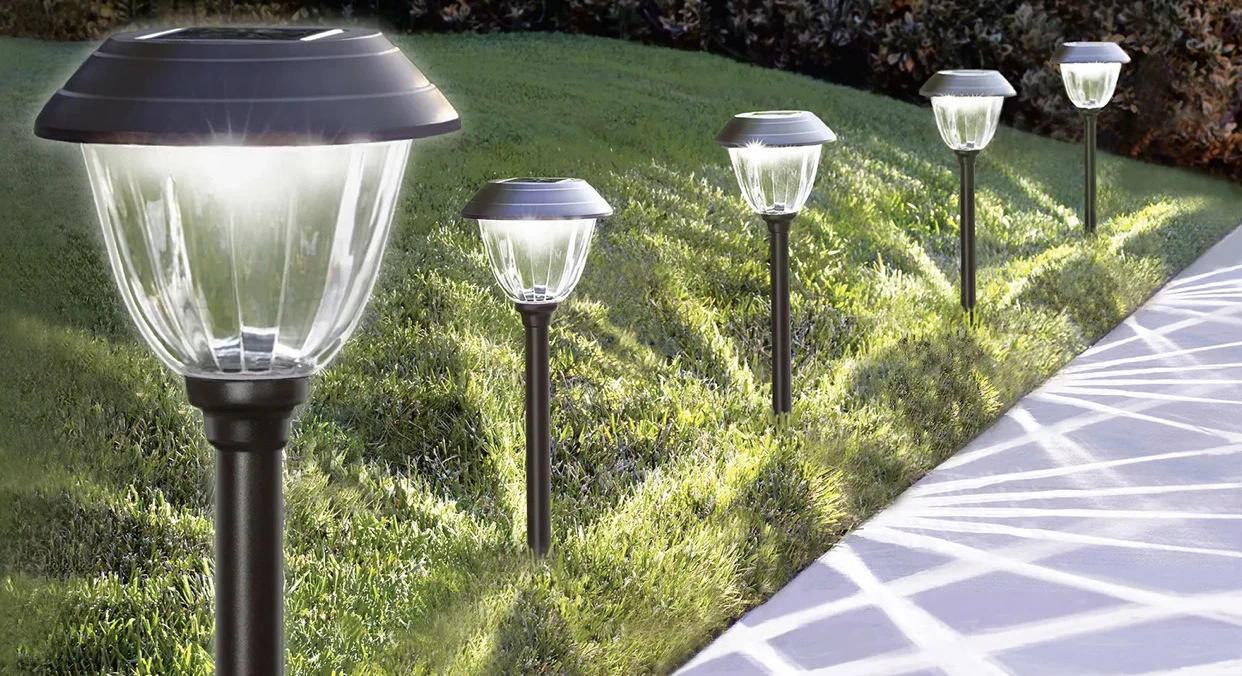

# Amazon Solar Lights Market Analysis

1. Extract data from Excel or CSV format

In [4]:
import requests
import json
import time
import pandas as pd
import numpy as np
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt

In [4]:
raw_df = pd.read_excel ('Solar_lights.xlsx',sheet_name ="solar_lights_clean" )

In [5]:
raw_df.head()

,Date,ASIN,SKU,品牌,商品标题,商品主图,父体,ASIN+,类目,BSR排名,...,BuyBox卖家国籍,BuyBox类型,Best Seller标识,Amazon's Choice,New Release标识,A+页面,视频介绍,重量,体积,最近更新
0,07/01/19,7805293678,NaN,Florals,"Solar Yellow Rose Flower Lights , Lamp, Solar ...",https://images-na.ssl-images-amazon.com/images...,NaN,7805293678,Home & Kitchen:Home Décor:Artificial Plants & ...,750524.0,...,US,FBM,NaN,NaN,NaN,NaN,NaN,1 pounds,12 x 8 x 24 inches,2019-11-30
1,08/01/19,7805293678,NaN,Florals,"Solar Yellow Rose Flower Lights , Lamp, Solar ...",https://images-na.ssl-images-amazon.com/images...,NaN,7805293678,Home & Kitchen:Home Décor:Artificial Plants & ...,750524.0,...,US,FBM,NaN,NaN,NaN,NaN,NaN,1 pounds,12 x 8 x 24 inches,2019-11-30
2,09/01/19,7805293678,NaN,Florals,"Solar Yellow Rose Flower Lights , Lamp, Solar ...",https://images-na.ssl-images-amazon.com/images...,NaN,7805293678,Home & Kitchen:Home Décor:Artificial Plants & ...,750524.0,...,US,FBM,NaN,NaN,NaN,NaN,NaN,1 pounds,12 x 8 x 24 inches,2019-11-30
3,07/01/19,B000BRCL0O,NaN,Progressive International,Progressive Dynamics PD308 Clear Optic Solar-S...,https://images-na.ssl-images-amazon.com/images...,NaN,B000BRCL0O,Automotive:Motorcycle & Powersports:Protective...,460368.0,...,US,FBM,NaN,NaN,NaN,NaN,NaN,0.1 pounds,7.5 x 0.1 x 1.1 inches,2020-05-26
4,10/01/19,B000BRCL0O,NaN,Progressive International,Progressive Dynamics PD308 Clear Optic Solar-S...,https://images-na.ssl-images-amazon.com/images...,NaN,B000BRCL0O,Automotive:Motorcycle & Powersports:Protective...,220107.0,...,US,FBM,NaN,NaN,NaN,NaN,NaN,1.6 ounces,7.5 x 0.1 x 1.1 inches,2020-05-18


In [6]:
df = raw_df[["Date","ASIN+","商品标题","品牌","类目","月销量","月销售额($)","价格($)","评分数","评分","重量","体积"]]
df.dropna(subset = ["月销量","月销售额($)","评分数","评分","重量","体积"], inplace=True)
df = df.rename(columns={"品牌":"brand","月销量": "monthly_sales_number", "月销售额($)": "monthly_sales_revenue",\
                        "商品标题":"product_title","类目":"category","价格($)":"price($)","评分数":"numbers_of_rate",\
                        "评分":"rate","重量":"Weight","体积":"Volumn"})

df

<ipython-input-6-ba7af4b2ba4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = ["月销量","月销售额($)","评分数","评分","重量","体积"], inplace=True)


,Date,ASIN+,product_title,brand,category,monthly_sales_number,monthly_sales_revenue,price($),numbers_of_rate,rate,Weight,Volumn
0,07/01/19,7805293678,"Solar Yellow Rose Flower Lights , Lamp, Solar ...",Florals,Home & Kitchen:Home Décor:Artificial Plants & ...,6.0,107.94,17.99,1.0,5.0,1 pounds,12 x 8 x 24 inches
1,08/01/19,7805293678,"Solar Yellow Rose Flower Lights , Lamp, Solar ...",Florals,Home & Kitchen:Home Décor:Artificial Plants & ...,4.0,71.96,17.99,1.0,5.0,1 pounds,12 x 8 x 24 inches
2,09/01/19,7805293678,"Solar Yellow Rose Flower Lights , Lamp, Solar ...",Florals,Home & Kitchen:Home Décor:Artificial Plants & ...,4.0,71.96,17.99,1.0,5.0,1 pounds,12 x 8 x 24 inches
3,07/01/19,B000BRCL0O,Progressive Dynamics PD308 Clear Optic Solar-S...,Progressive International,Automotive:Motorcycle & Powersports:Protective...,53.0,185.50,3.50,15.0,3.5,0.1 pounds,7.5 x 0.1 x 1.1 inches
4,10/01/19,B000BRCL0O,Progressive Dynamics PD308 Clear Optic Solar-S...,Progressive International,Automotive:Motorcycle & Powersports:Protective...,45.0,306.90,6.94,17.0,3.4,1.6 ounces,7.5 x 0.1 x 1.1 inches
...,...,...,...,...,...,...,...,...,...,...,...,...
187844,11/01/20,B09311PDDW,"Solar Lights Outdoor, Aootek 2-in-1 Adjustable...",Aootek,Tools & Home Improvement:Lighting & Ceiling Fa...,0.0,0.00,29.99,76.0,4.9,2.23 pounds,11 x 5.9 x 3.9 inches
187845,12/01/20,B09311PDDW,"Solar Lights Outdoor, Aootek 2-in-1 Adjustable...",Aootek,Tools & Home Improvement:Lighting & Ceiling Fa...,0.0,0.00,29.99,76.0,4.9,2.23 pounds,11 x 5.9 x 3.9 inches
187846,02/01/21,B09311PDDW,"Solar Lights Outdoor, Aootek 2-in-1 Adjustable...",Aootek,Tools & Home Improvement:Lighting & Ceiling Fa...,0.0,0.00,29.99,76.0,4.9,2.23 pounds,11 x 5.9 x 3.9 inches
187847,03/01/21,B09311PDDW,"Solar Lights Outdoor, Aootek 2-in-1 Adjustable...",Aootek,Tools & Home Improvement:Lighting & Ceiling Fa...,0.0,0.00,29.99,76.0,4.9,2.23 pounds,11 x 5.9 x 3.9 inches


2. Data Clearning

In [7]:
def weight_replace(row):
    if row["Weight"][-3:] == "nds":
        return float(row["Weight"][:-6])*16
    else:
        return float(row['Weight'][:-6])
    
def volumn_replace(row):
    check = 0
    if row["Volumn"][-3:] == "hes":
        volumn = row["Volumn"][:-6]
    else:
        volumn = row["Volumn"][:-8]  
        check = 1
    volumn = volumn.split("x")
    result = 1
    for i in volumn:
        i = i.replace(",","")
        result *= float(i)
        if check == 1:
            result *= (0.91**3)
    return result


In [8]:
df["new_weight"] = df.apply(lambda row : weight_replace(row), axis = 1)
df["new_volumn"] = df.apply(lambda row : volumn_replace(row), axis = 1)
df

,Date,ASIN+,product_title,brand,category,monthly_sales_number,monthly_sales_revenue,price($),numbers_of_rate,rate,Weight,Volumn,new_weight,new_volumn
0,07/01/19,7805293678,"Solar Yellow Rose Flower Lights , Lamp, Solar ...",Florals,Home & Kitchen:Home Décor:Artificial Plants & ...,6.0,107.94,17.99,1.0,5.0,1 pounds,12 x 8 x 24 inches,16.00,2304.00000
1,08/01/19,7805293678,"Solar Yellow Rose Flower Lights , Lamp, Solar ...",Florals,Home & Kitchen:Home Décor:Artificial Plants & ...,4.0,71.96,17.99,1.0,5.0,1 pounds,12 x 8 x 24 inches,16.00,2304.00000
2,09/01/19,7805293678,"Solar Yellow Rose Flower Lights , Lamp, Solar ...",Florals,Home & Kitchen:Home Décor:Artificial Plants & ...,4.0,71.96,17.99,1.0,5.0,1 pounds,12 x 8 x 24 inches,16.00,2304.00000
3,07/01/19,B000BRCL0O,Progressive Dynamics PD308 Clear Optic Solar-S...,Progressive International,Automotive:Motorcycle & Powersports:Protective...,53.0,185.50,3.50,15.0,3.5,0.1 pounds,7.5 x 0.1 x 1.1 inches,1.60,0.82500
4,10/01/19,B000BRCL0O,Progressive Dynamics PD308 Clear Optic Solar-S...,Progressive International,Automotive:Motorcycle & Powersports:Protective...,45.0,306.90,6.94,17.0,3.4,1.6 ounces,7.5 x 0.1 x 1.1 inches,1.60,0.82500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187844,11/01/20,B09311PDDW,"Solar Lights Outdoor, Aootek 2-in-1 Adjustable...",Aootek,Tools & Home Improvement:Lighting & Ceiling Fa...,0.0,0.00,29.99,76.0,4.9,2.23 pounds,11 x 5.9 x 3.9 inches,35.68,253.11000
187845,12/01/20,B09311PDDW,"Solar Lights Outdoor, Aootek 2-in-1 Adjustable...",Aootek,Tools & Home Improvement:Lighting & Ceiling Fa...,0.0,0.00,29.99,76.0,4.9,2.23 pounds,11 x 5.9 x 3.9 inches,35.68,253.11000
187846,02/01/21,B09311PDDW,"Solar Lights Outdoor, Aootek 2-in-1 Adjustable...",Aootek,Tools & Home Improvement:Lighting & Ceiling Fa...,0.0,0.00,29.99,76.0,4.9,2.23 pounds,11 x 5.9 x 3.9 inches,35.68,253.11000
187847,03/01/21,B09311PDDW,"Solar Lights Outdoor, Aootek 2-in-1 Adjustable...",Aootek,Tools & Home Improvement:Lighting & Ceiling Fa...,0.0,0.00,29.99,76.0,4.9,2.23 pounds,11 x 5.9 x 3.9 inches,35.68,253.11000


In [9]:
by_brand =  df.groupby('brand').mean()
by_brand

,monthly_sales_number,monthly_sales_revenue,price($),numbers_of_rate,rate,new_weight,new_volumn
brand,,,,,,,
Home Zone,341.250000,10633.887500,30.656667,182.000000,4.058333,26.080000,23.040000
LPINYE,1.500000,57.925000,48.990000,1.000000,4.000000,35.680000,106.550640
Valery Madelyn,29.000000,677.387500,23.740000,24.000000,3.150000,44.000000,399.432000
iRSE,0.000000,0.000000,0.000000,18.000000,4.400000,12.800000,41.748000
&quot;N/A&quot;,36.650000,1331.016500,36.240000,24.450000,4.710000,17.600000,379603.584000
...,...,...,...,...,...,...,...
zoneyee,60.416667,1727.963333,27.573333,15.375000,4.362500,19.133333,107.982667
zoopod,10.750000,453.830000,43.490000,6.125000,4.850000,66.060000,1044.207416
zqasales,4.800000,49.552000,9.990000,3.100000,1.790000,22.370000,0.214000


In [10]:
revenue = by_brand["monthly_sales_revenue"]
revenue.index

Index(['   Home Zone', ' LPINYE', ' Valery Madelyn ', ' iRSE',
       '&quot;N/A&quot;', '-eternal-', '.&amp;^', '/N', '1 BY ONE', '12',
       ...
       'zazen', 'zenic', 'zhengshizuo', 'zhiweikm', 'zimo', 'zoneyee',
       'zoopod', 'zqasales', 'ztarx', 'zuppnm'],
      dtype='object', name='brand', length=7124)

In [15]:
df.describe()

,monthly_sales_number,monthly_sales_revenue,price($),numbers_of_rate,rate,new_weight,new_volumn
count,162357.000000,1.623570e+05,161676.000000,162357.000000,162357.000000,162357.000000,1.623570e+05
mean,156.091982,5.027101e+03,30.358975,146.256558,3.997613,31.669596,7.467471e+03
std,541.509226,2.152710e+04,34.102991,591.855253,0.849212,64.197625,1.330546e+05
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,4.000000,6.796000e+01,16.790000,6.000000,3.700000,10.560000,7.884000e+01
50%,18.000000,4.157400e+02,23.990000,23.000000,4.100000,17.600000,1.534500e+02
75%,95.000000,2.534700e+03,34.880000,86.000000,4.500000,32.320000,3.599960e+02
max,28555.000000,2.131345e+06,1595.100000,23590.000000,5.000000,7054.720000,1.464623e+07


3. Upload data to local MySQL server

In [62]:

try:
    connection = mysql.connector.connect(
        host="localhost",
        user="root",
        password="password",
        database="testmysql"
        )

    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("CREATE TABLE solar_light (Date VARCHAR(255) ,\
                       ASIN VARCHAR(255) ,\
                       product_title VARCHAR(255),\
                       brand VARCHAR(255) ,\
                       category VARCHAR(255),\
                       monthly_sales_number double,\
                       monthly_sales_revenue double,\
                       price double ,\
                       numbers_of_rate double ,\
                       rate double ,\
                       weight VARCHAR(255) ,\
                       volumn VARCHAR(255),\
                       new_weight double ,\
                       new_volumn double)")
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("Your connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

Connected to MySQL Server version  8.0.25
Error while connecting to MySQL 1050 (42S01): Table 'solar_light' already exists
MySQL connection is closed


In [18]:

def insert_value_to_solarlight(value):
    try:
        connection = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="testmysql"
            )


        if connection.is_connected():
            db_Info = connection.get_server_info()
      
            cursor = connection.cursor()


            sql = """INSERT INTO solar_light (Date, ASIN, product_title, brand, category,\
            monthly_sales_number, monthly_sales_revenue, price, numbers_of_rate, rate, weight, volumn, new_weight, new_volumn)\
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""
            cursor.execute(sql, value)
            connection.commit()
            

    except mysql.connector.Error as error:
        print('Please check your code') 

    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            
    
    

In [ ]:
for i, row in df.iterrows():
    insert_value_to_solarlight(tuple(row))


In [ ]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN)

4. Load data from MySQL localhost for visualization

In [5]:
try:   
    connection = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="testmysql"
            )

    cursor = connection.cursor()

    cursor.execute('SELECT * FROM solar_light')

    table_rows = cursor.fetchall()

    df_sql = pd.DataFrame(table_rows)
    df_sql.columns = cursor.column_names
    
except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

MySQL connection is closed


In [6]:
by_date =  df_sql.groupby('Date').sum()
by_date = by_date.sort_index(key = lambda col: col.map(lambda x: (x[-2:],x[:2])) )

4.1 Market Trend Analysis

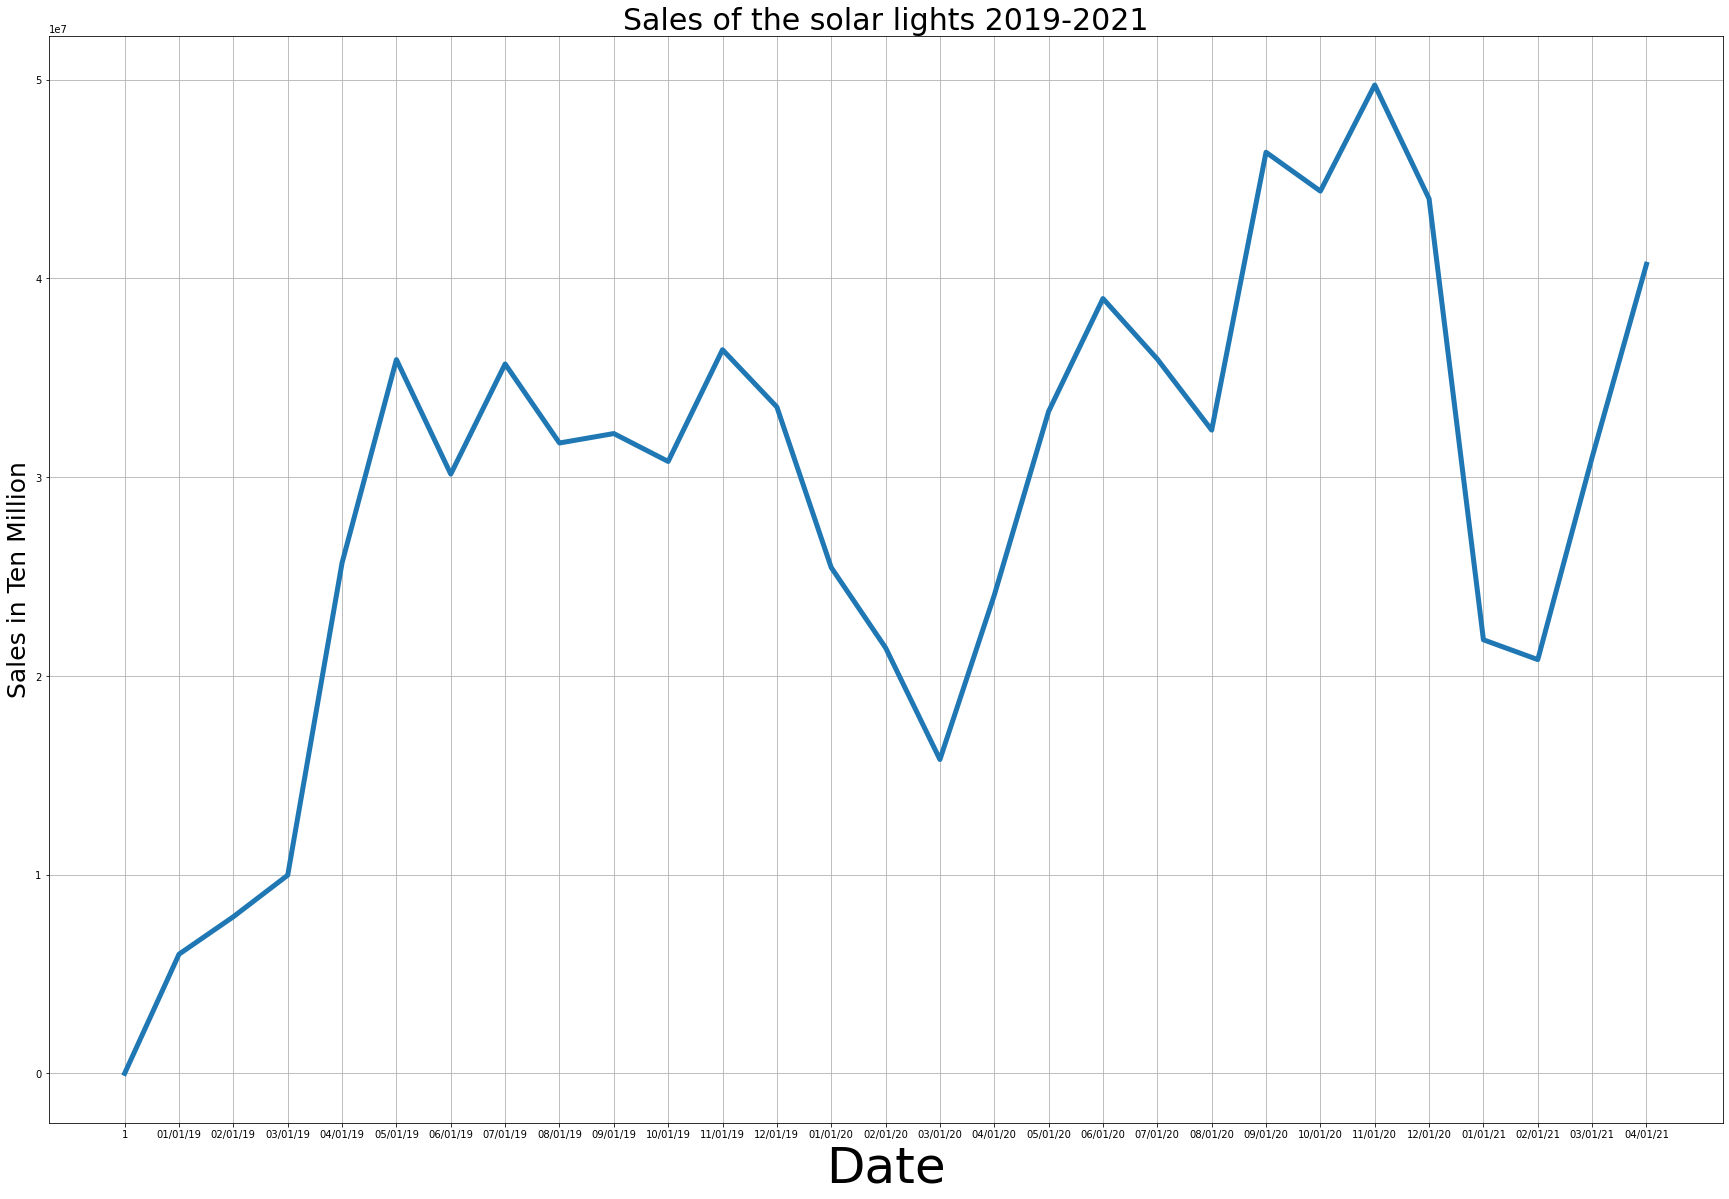

In [7]:
revenue = by_date["monthly_sales_revenue"]
plt.figure(figsize=(30,20))
plt.plot(revenue,linewidth=5.0)
plt.xlabel('Date', fontsize = 50)
plt.ylabel('Sales in Ten Million', fontsize = 25)
plt.title('Sales of the solar lights 2019-2021', fontsize = 30)
plt.grid()
plt.show()

4.2 Solar light performance by category
This insight shows that what you should be focusing on if you want to sale solar lights with Amazon.

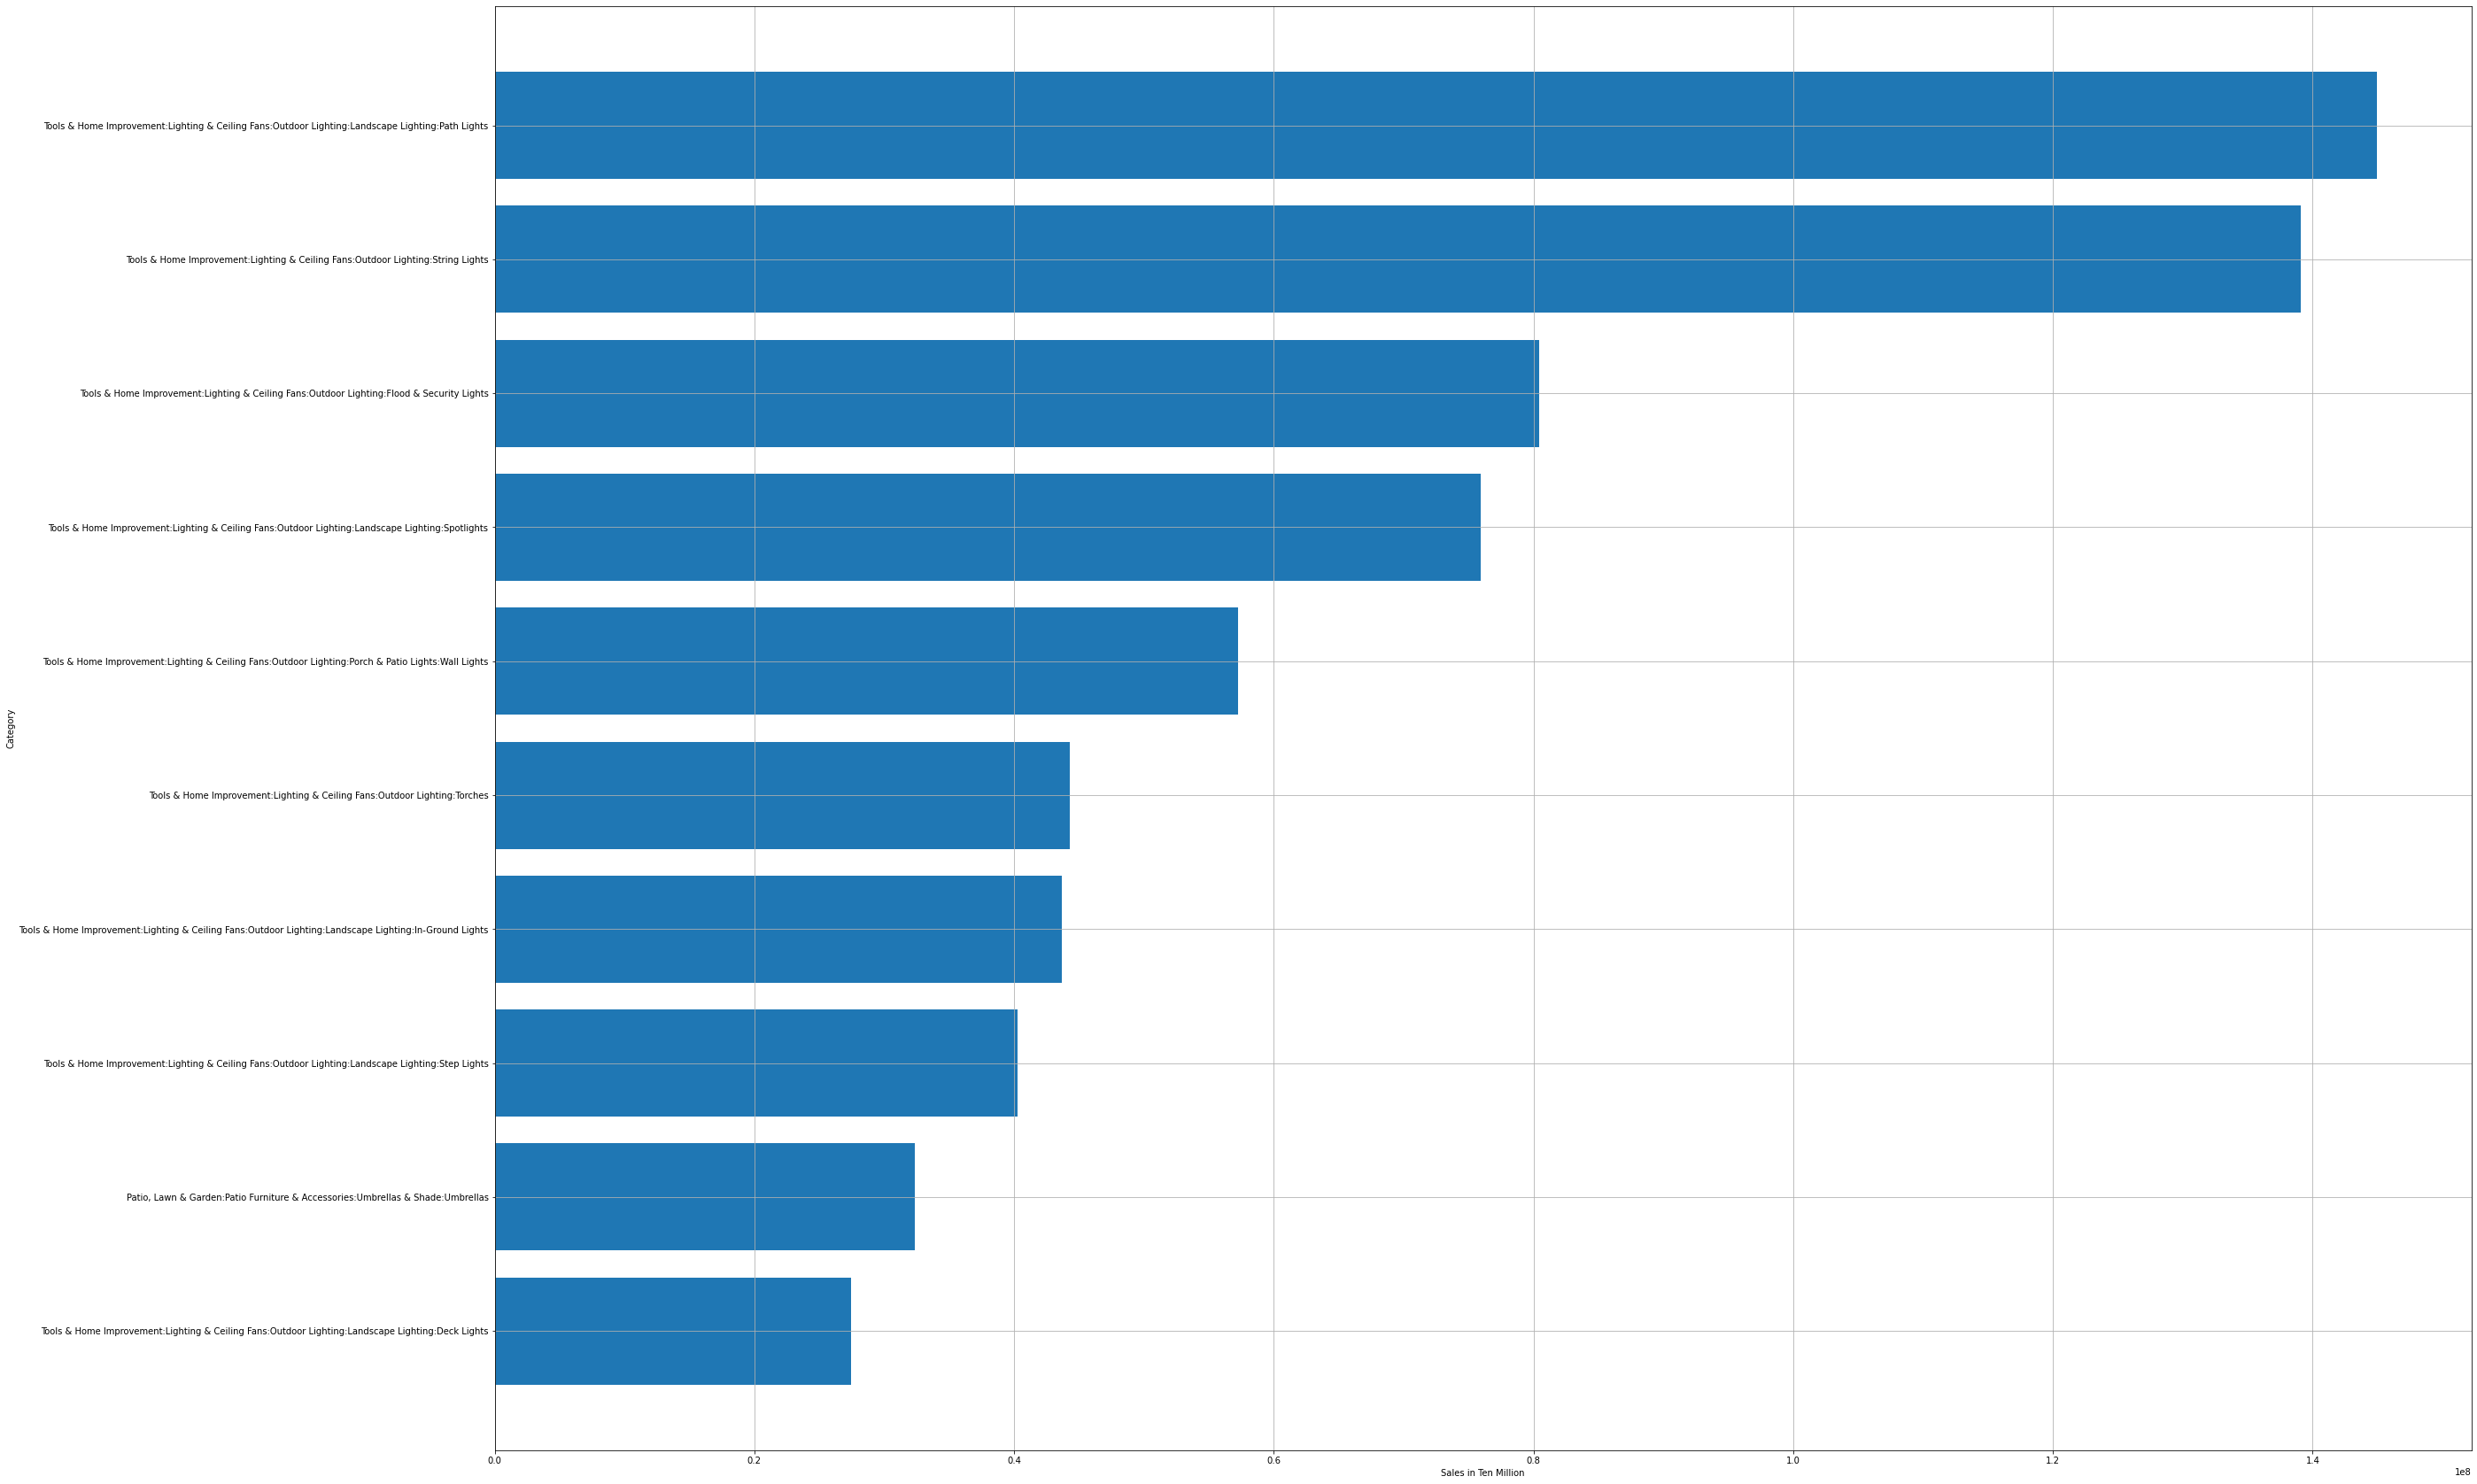

In [61]:
by_category =  df_sql[['category','monthly_sales_revenue']].groupby('category').sum()
by_category = by_category.sort_values(by = ['monthly_sales_revenue'], ascending = False)
by_category.nlargest(20,'monthly_sales_revenue',keep='first')
revenue = by_category['monthly_sales_revenue'][0:10]
category=revenue.index
plt.figure(figsize=(40,30))
plt.barh(category,revenue)
plt.xlabel('Sales in Ten Million')
plt.ylabel('Category')
plt.grid()
plt.gca().invert_yaxis()
plt.show()

In [9]:
print('Top 10 Hot Selling Categories are: ')
for i in category:
    print(i)

Top 10 Hot Selling Categories are: 
Tools & Home Improvement:Lighting & Ceiling Fans:Outdoor Lighting:Landscape Lighting:Path Lights
Tools & Home Improvement:Lighting & Ceiling Fans:Outdoor Lighting:String Lights
Tools & Home Improvement:Lighting & Ceiling Fans:Outdoor Lighting:Flood & Security Lights
Tools & Home Improvement:Lighting & Ceiling Fans:Outdoor Lighting:Landscape Lighting:Spotlights
Tools & Home Improvement:Lighting & Ceiling Fans:Outdoor Lighting:Porch & Patio Lights:Wall Lights
Tools & Home Improvement:Lighting & Ceiling Fans:Outdoor Lighting:Torches
Tools & Home Improvement:Lighting & Ceiling Fans:Outdoor Lighting:Landscape Lighting:In-Ground Lights
Tools & Home Improvement:Lighting & Ceiling Fans:Outdoor Lighting:Landscape Lighting:Step Lights
Patio, Lawn & Garden:Patio Furniture & Accessories:Umbrellas & Shade:Umbrellas
Tools & Home Improvement:Lighting & Ceiling Fans:Outdoor Lighting:Landscape Lighting:Deck Lights


4.3 Market Concentration Rate

In [59]:
df_percent = df_sql.pivot_table(columns=['brand'], aggfunc='size').sort_values(ascending=False)

In [60]:
Brand = [i for i in df_percent.index]
total = [i for i in df_percent]

In [49]:
total_rate = sum(total)

In [56]:
Total_rate = []
for i in total:
    rate = i/total_rate
    percentage = "{:.3%}".format(i/total_rate)
    Total_rate.append(percentage)

In [57]:
d = {'Brand':Brand, 'Concentration_rate':Total_rate}

In [58]:
df_concentration_rate = pd.DataFrame(data = d)
df_concentration_rate

,Brand,Concentration_rate
0,Exhart,0.960%
1,LITOM,0.854%
2,GIGALUMI,0.761%
3,Sogrand,0.668%
4,Qedertek,0.589%
...,...,...
7077,Brand: HDNICE,0.001%
7078,Brand: Grenature,0.001%
7079,Micsus,0.001%
7080,Brand: Glumes,0.001%


By looking at the table, it shows that the market has a low concentration and it's a useful insight for small sellers to come in and make profit since other brands do not have so many products that take over the market.